In [22]:
import argparse
from glob import glob
from os import path
import pickle
from nilearn import plotting
from nistats.thresholding import map_threshold
import sys

from utils.firstlevel_utils import get_first_level_objs
from utils.firstlevel_plot_utils import (plot_design, plot_design_timeseries, 
                                         plot_design_heatmap, plot_contrast,
                                        plot_map, plot_task_maps)

In [19]:
parser = argparse.ArgumentParser(description='2nd level Entrypoint Script.')
parser.add_argument('-derivatives_dir', default=None)
parser.add_argument('--skip_first', action='store_true')
parser.add_argument('--skip_second', action='store_true')
parser.add_argument('--save', action='store_true')

if '-derivatives_dir' in sys.argv or '-h' in sys.argv:
    args = parser.parse_args()
else:
    args = parser.parse_args([])
    args.derivatives_dir = '../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/'
    args.data_dir = '../../../tmp/OAK/data/uh2/aim1/BIDS_scans/'
    args.tasks = ['stroop']
    args.rt=True
    args.save=True
    %matplotlib inline

In [20]:
# set paths
first_level_dir = path.join(args.derivatives_dir, '1stlevel')
second_level_dir = path.join(args.derivatives_dir,'2ndlevel')
fmriprep_dir = path.join(args.derivatives_dir, 'fmriprep')
tasks = ['ANT', 'CCTHot', 'discountFix',
        'DPX', 'motorSelectiveStop',
        'stopSignal', 'stroop',
        'twoByTwo', 'WATT3']
save = args.save
run_first_level = not args.skip_first
run_second_level = not args.skip_second

# Design Visualization

In [ ]:
# load design
subject_id, task = 's592', 'stroop'
files = get_first_level_objs(subject_id, task, first_level_dir, regress_rt=False)
subjinfo = pickle.load(open(files[0], 'rb'))

In [ ]:
# display the glm to make sure its not wonky - useful for doublechecking, not necessary #
#    from nistats.reporting import plot_design_matrix
#    import matplotlib.pyplot as plt
#    fig, (ax1) = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
#    ax1.set_title(subjinfo)
#    plot_design_matrix(design_matrix, ax=ax1)
####

In [ ]:
plot_design(subjinfo)
plot_design_timeseries(subjinfo, 0, 100)
plot_design_heatmap(subjinfo)

# First Level Visualization

In [ ]:
if run_first_level:
    for task in tasks:
        contrast_maps = glob(path.join(first_level_dir, '*s358*', task, '*maps*', '*.nii.gz'))
        for map_file in contrast_maps:
            contrast_name = map_file[map_file.index('contrast')+9:].rstrip('.nii.gz')
            f = plot_map(map_file, title=contrast_name)
            if save:
                output = map_file.replace('.nii.gz', '_plots.pdf')
                f.savefig(output)

# Second Level Visualization

In [62]:
import matplotlib.pyplot as plt
import numpy as np
def plot_task_maps(contrast_maps, suptitle, stat_kwargs=None):
    print(suptitle)
    if stat_kwargs is None:
        stat_kwargs = {}
    # set up plot
    f, axes = plt.subplots(len(contrast_maps), 1, figsize=(20,len(contrast_maps)*5), squeeze=False)
    plt.suptitle(suptitle, fontsize=36)
    
    n = np.arange(-40, 67, 15)
    # plot indepth stats brain
    stat_args = {'threshold': 3,
                 'cut_coords': n,
                 'black_bg': True}
    stat_args.update(**stat_kwargs)
    
    #plot a contrast per row
    for idx, contrast_map in enumerate(contrast_maps):
        title = contrast_map[contrast_map.index('contrast')+9:].rstrip('.nii.gz') #get contrast name
        print(title)
        plotting.plot_stat_map(contrast_map, title=title, display_mode='z', axes=axes[idx][0], **stat_args)
    plt.subplots_adjust(hspace=0)
    return f

running!
ANT
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/ANT/secondlevel-RT-False_beta-False_maps
ANT_RT-False
task


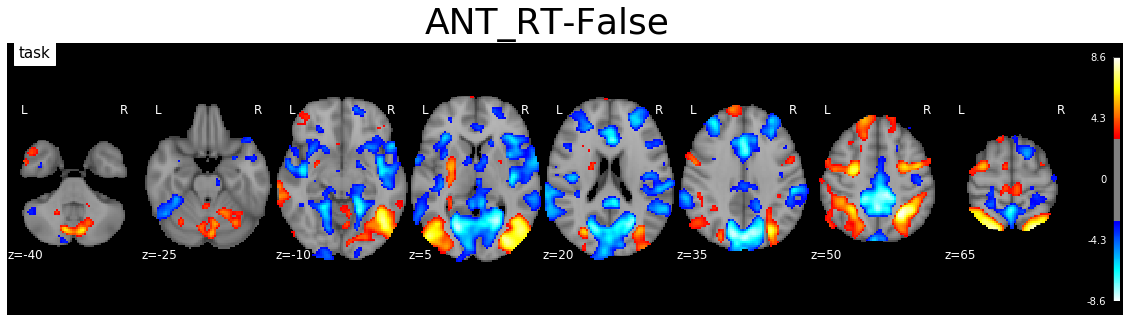

ANT_RT-False
task_raw_tfile
ANT_RT-False
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/ANT/secondlevel-RT-True_beta-False_maps
ANT_RT-True
RT
task


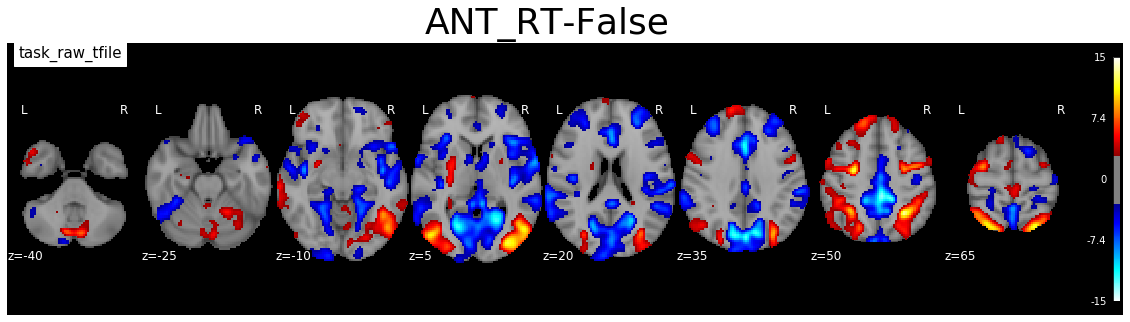

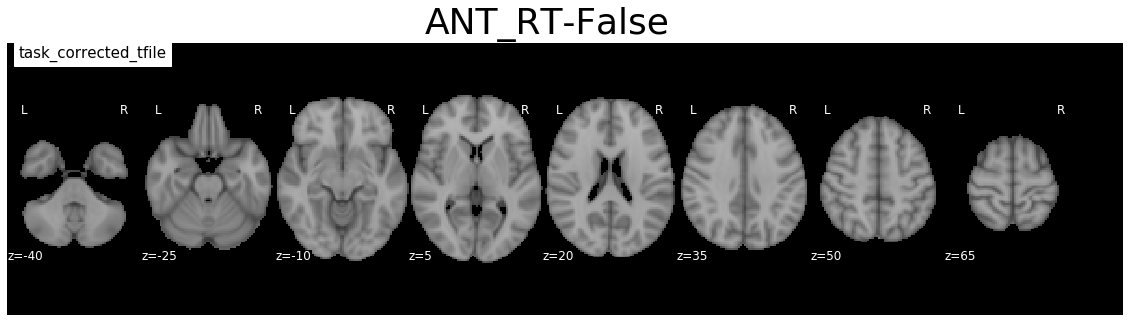

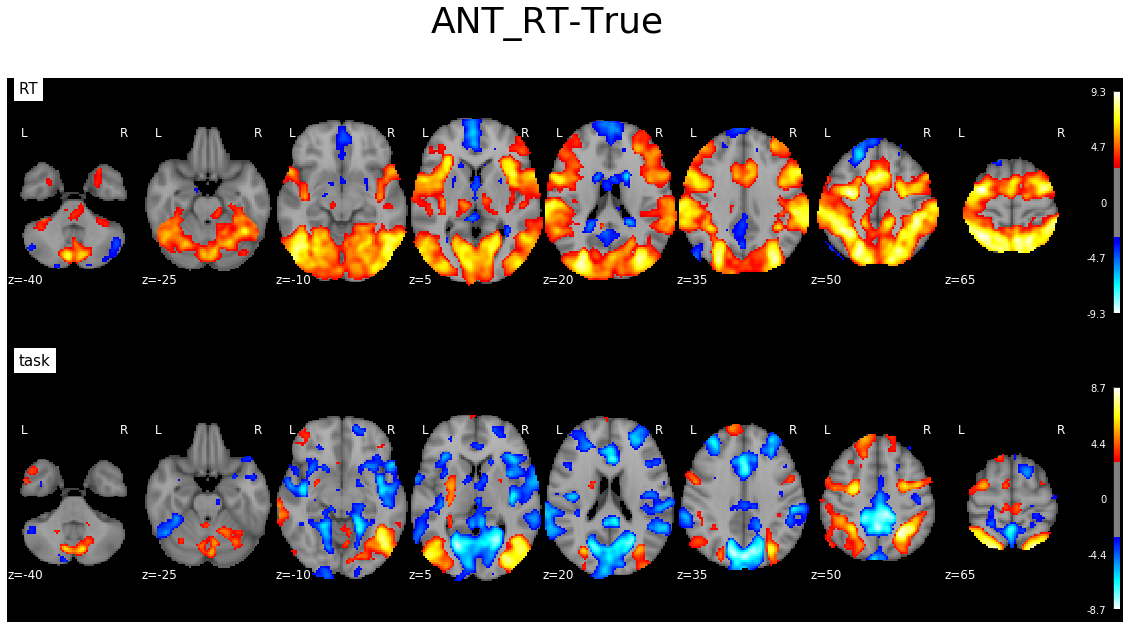

ANT_RT-True
RT_raw_tfile
task_raw_tfile
ANT_RT-True
RT_corrected_tfile
task_corrected_tfile
CCTHot
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/CCTHot/secondlevel-RT-False_beta-False_maps
CCTHot_RT-False
task


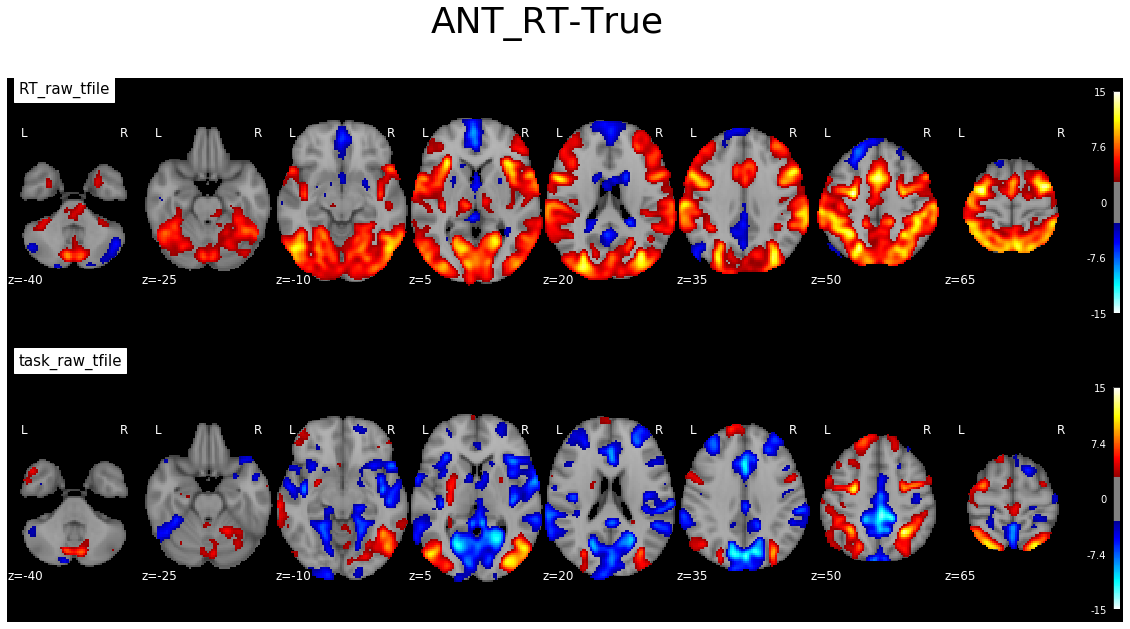

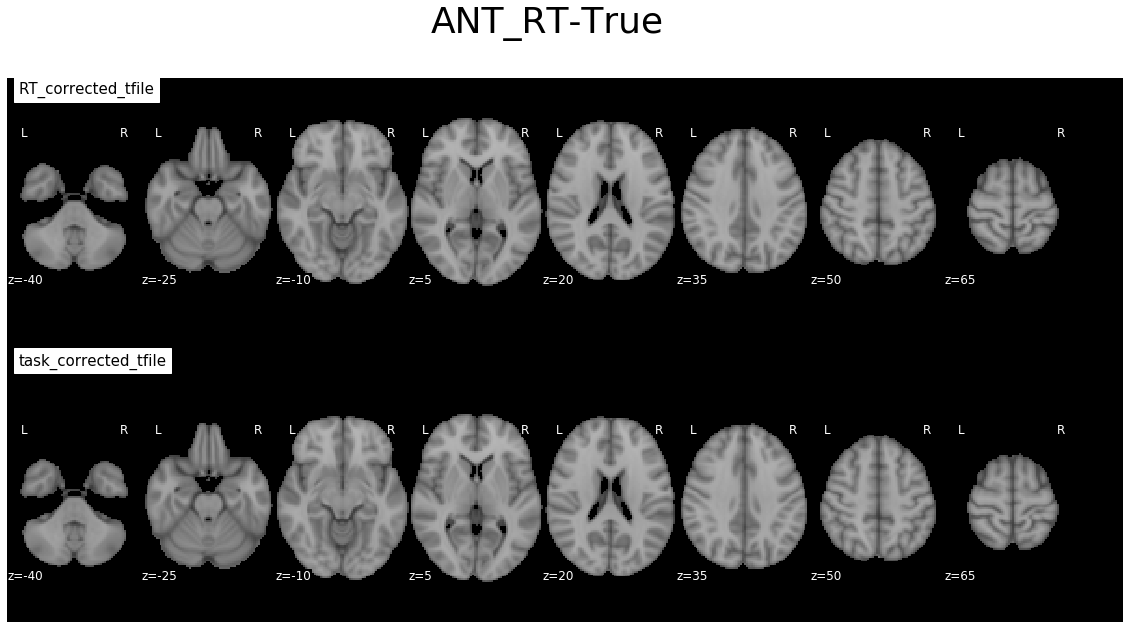

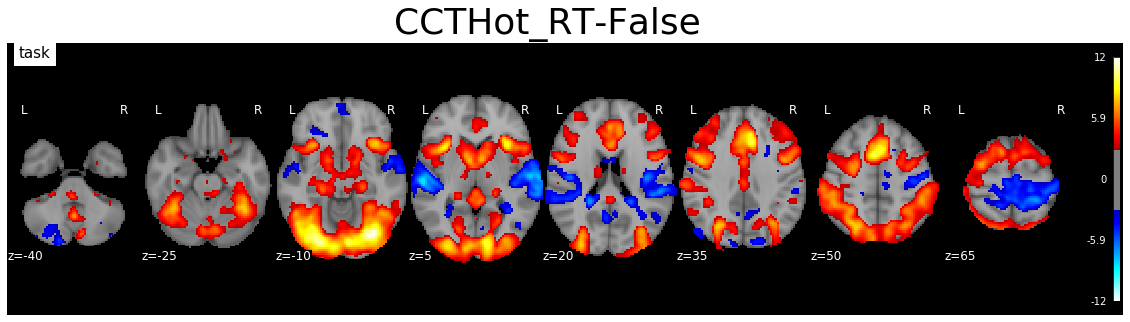

CCTHot_RT-False
task_raw_tfile
CCTHot_RT-False
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/CCTHot/secondlevel-RT-True_beta-False_maps
CCTHot_RT-True
RT
task


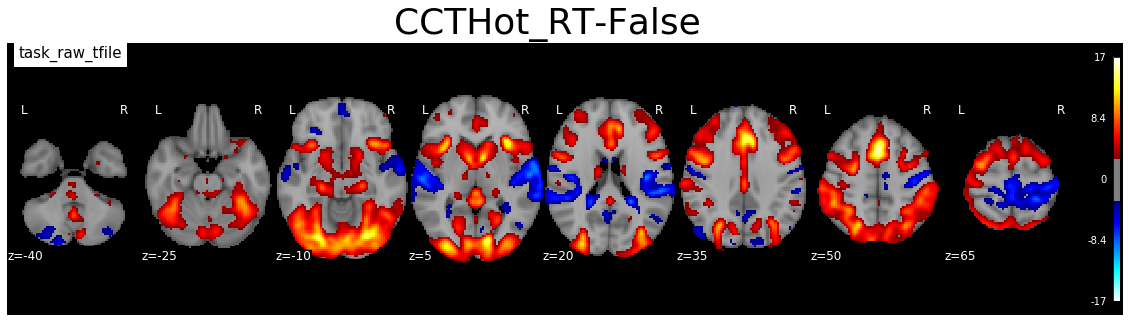

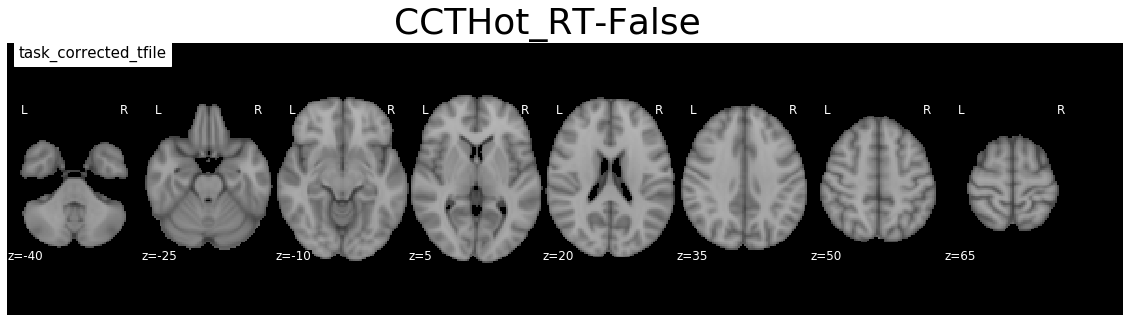

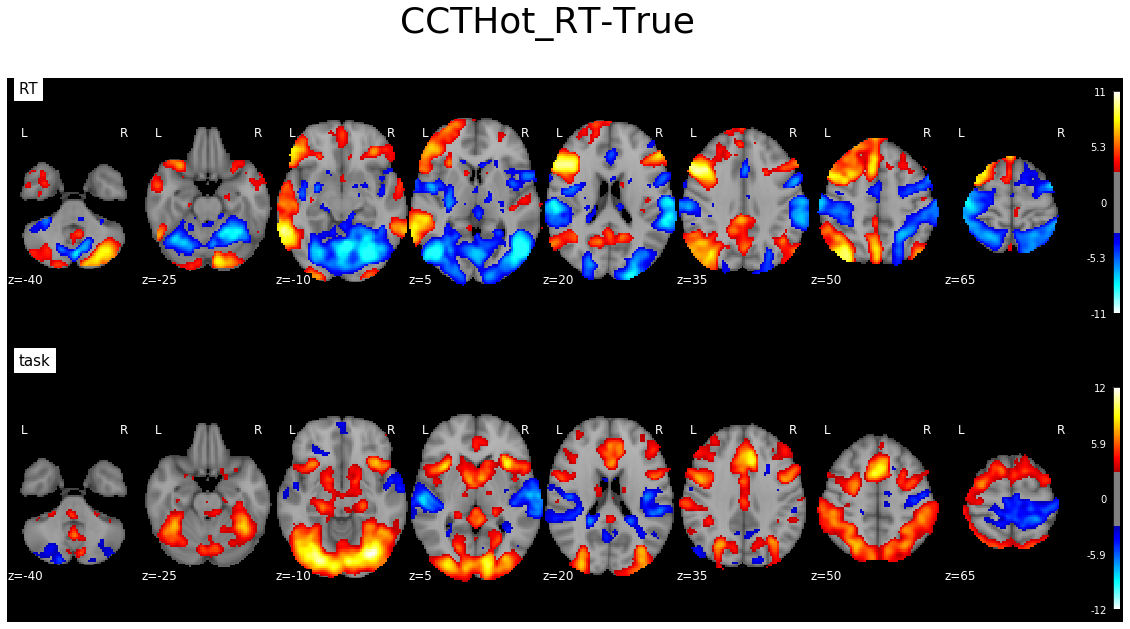

CCTHot_RT-True
RT_raw_tfile
task_raw_tfile
CCTHot_RT-True
RT_corrected_tfile
task_corrected_tfile
discountFix
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/discountFix/secondlevel-RT-False_beta-False_maps
discountFix_RT-False
task


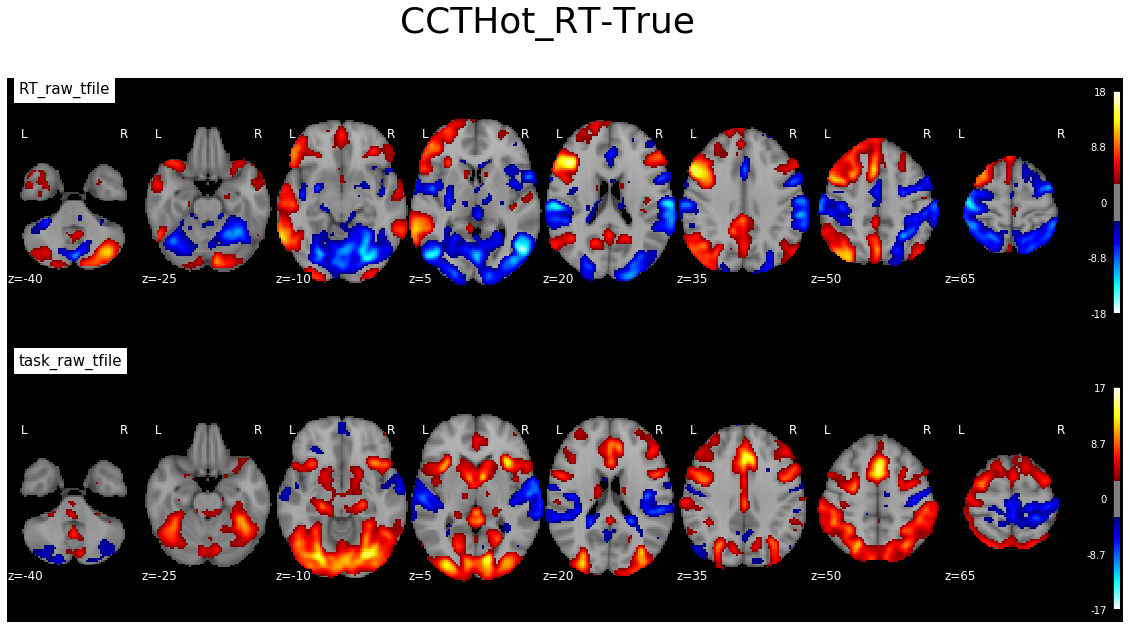

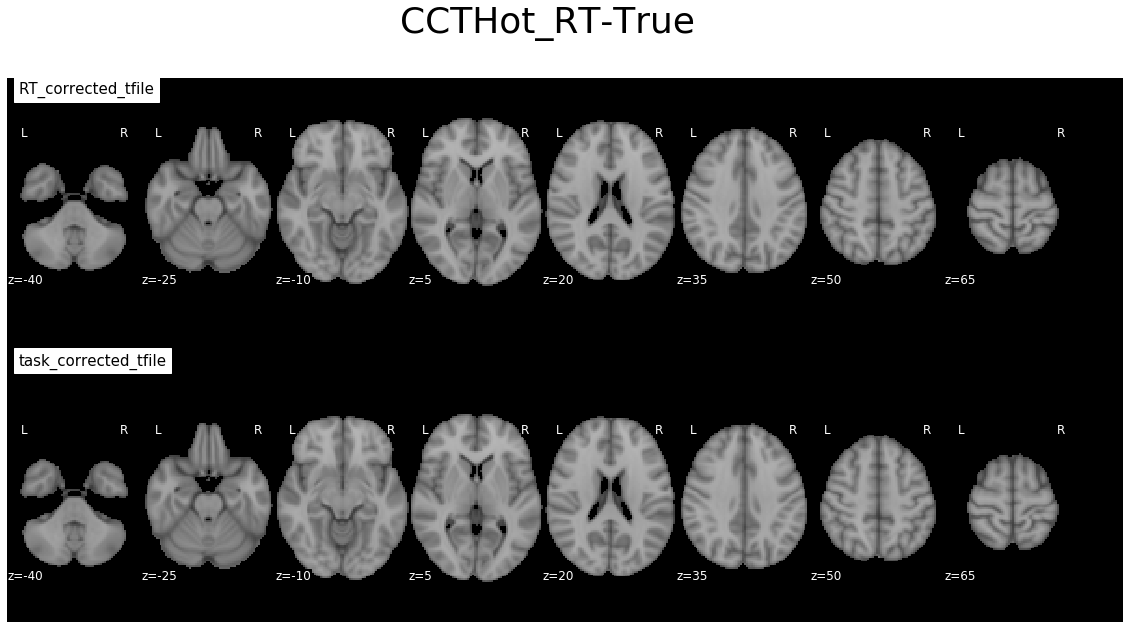

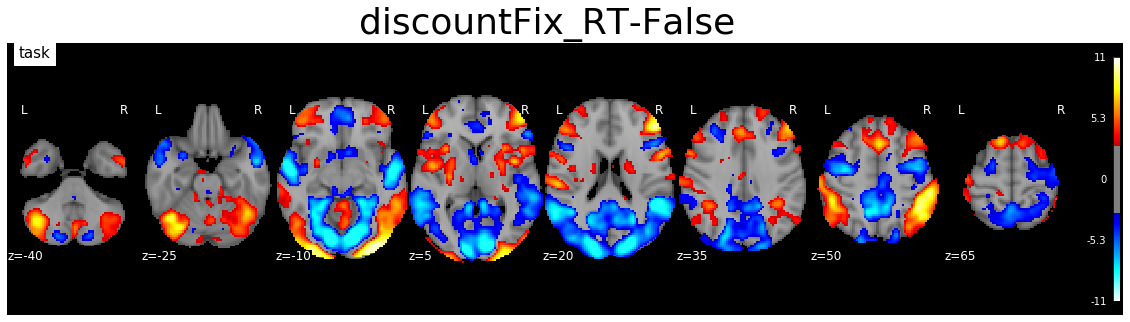

discountFix_RT-False
task_raw_tfile
discountFix_RT-False
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/discountFix/secondlevel-RT-True_beta-False_maps
discountFix_RT-True
RT
task


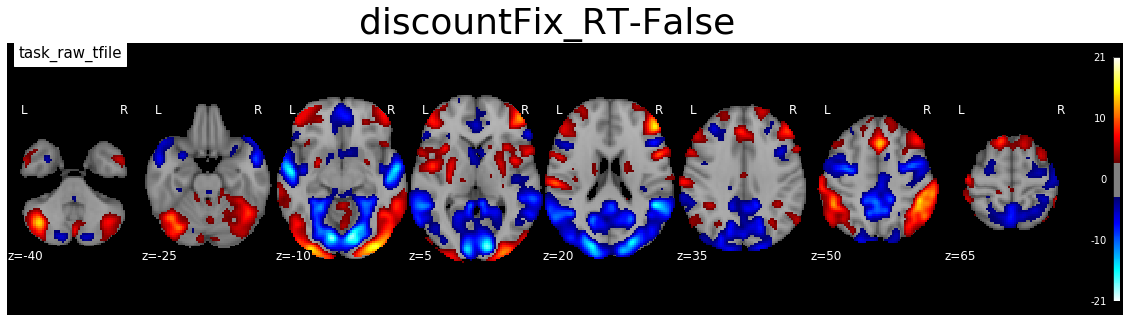

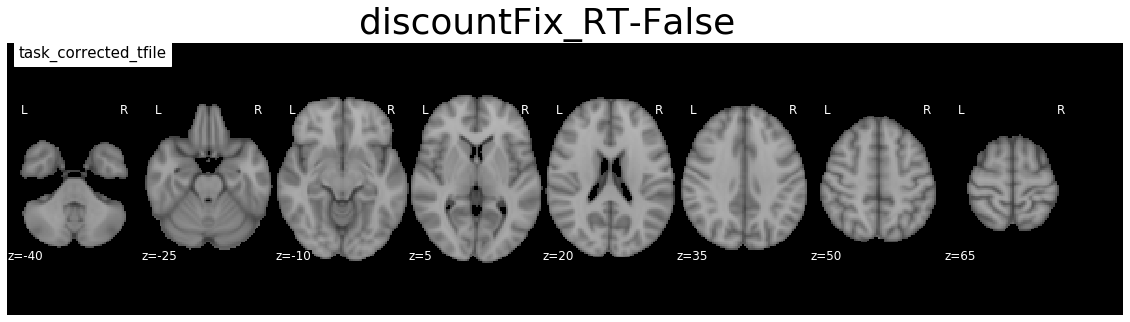

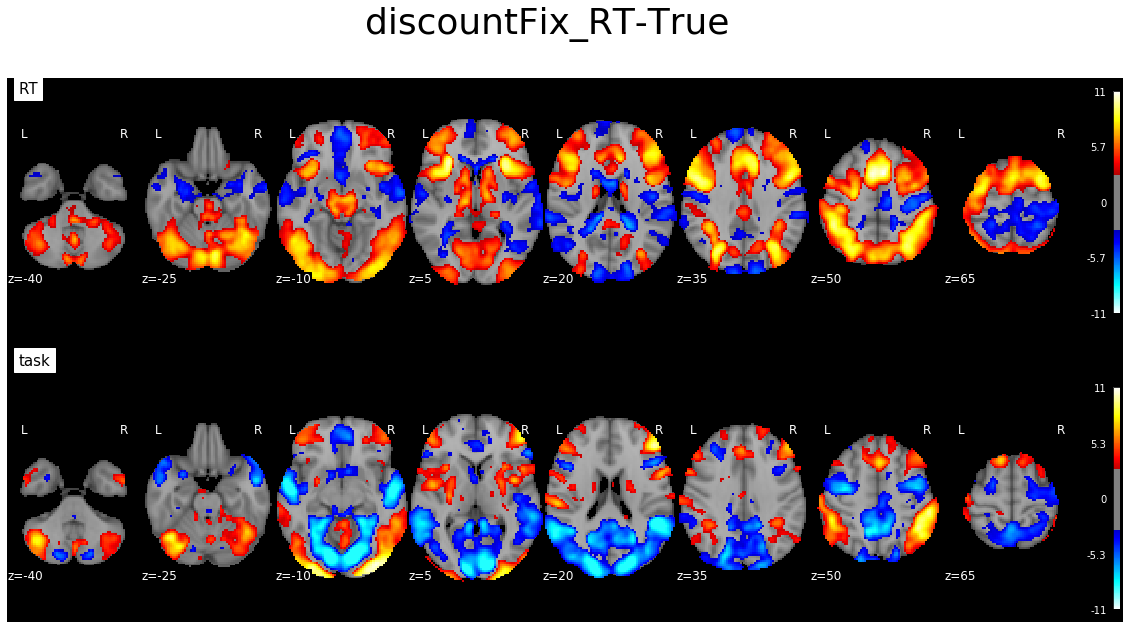

discountFix_RT-True
RT_raw_tfile
task_raw_tfile
discountFix_RT-True
RT_corrected_tfile
task_corrected_tfile
DPX
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/DPX/secondlevel-RT-False_beta-False_maps
DPX_RT-False
AX
AY-BY
AY
BX-BY
BX
BY
task


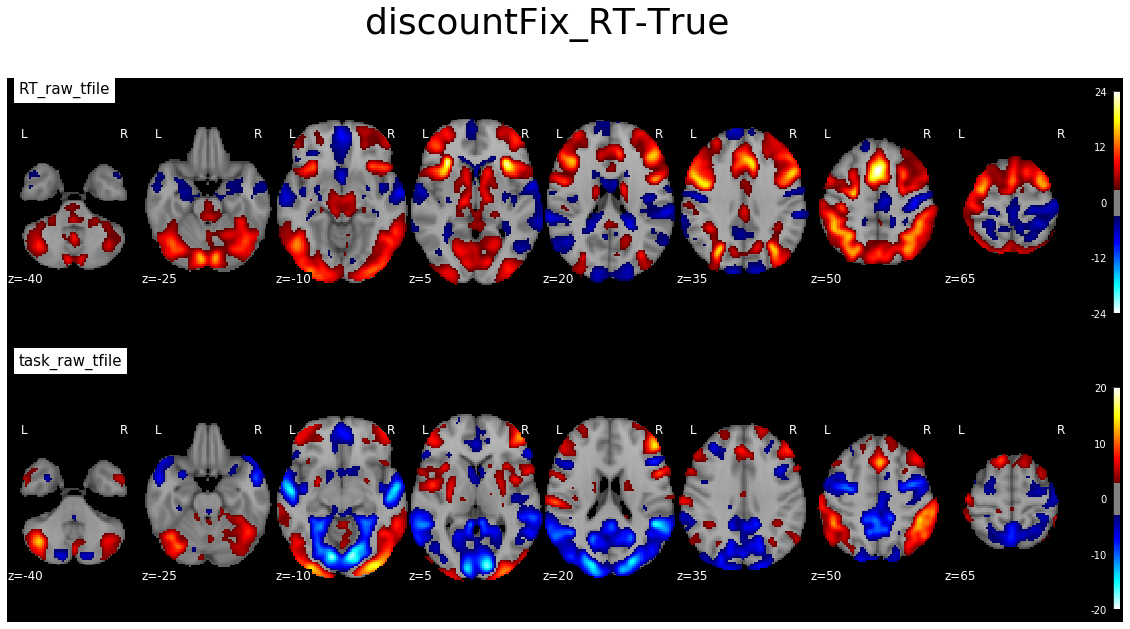

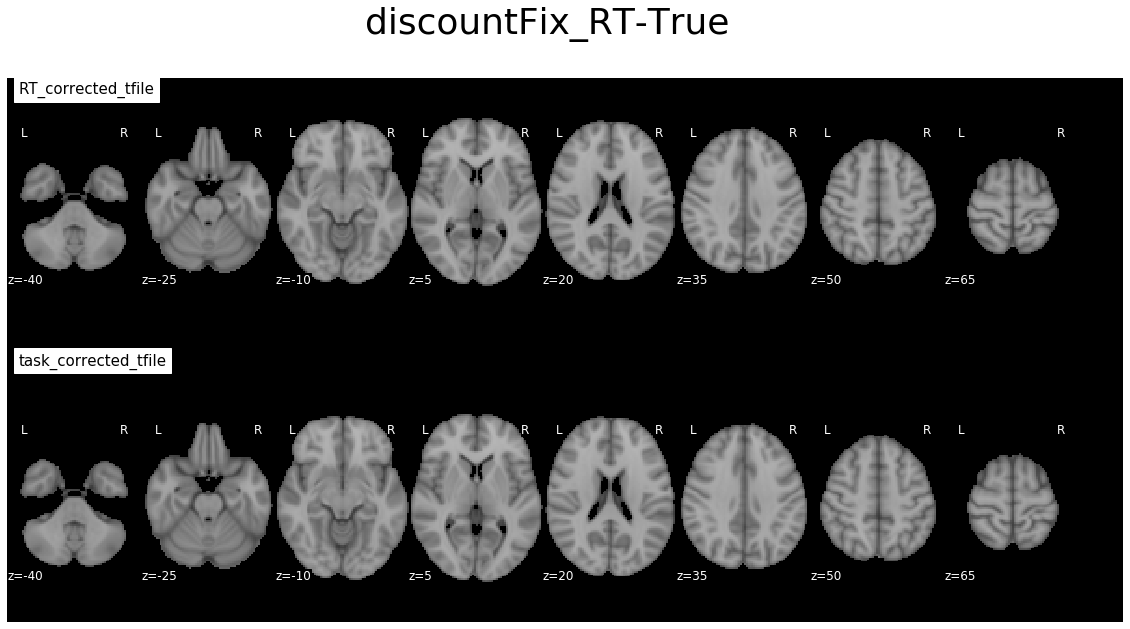

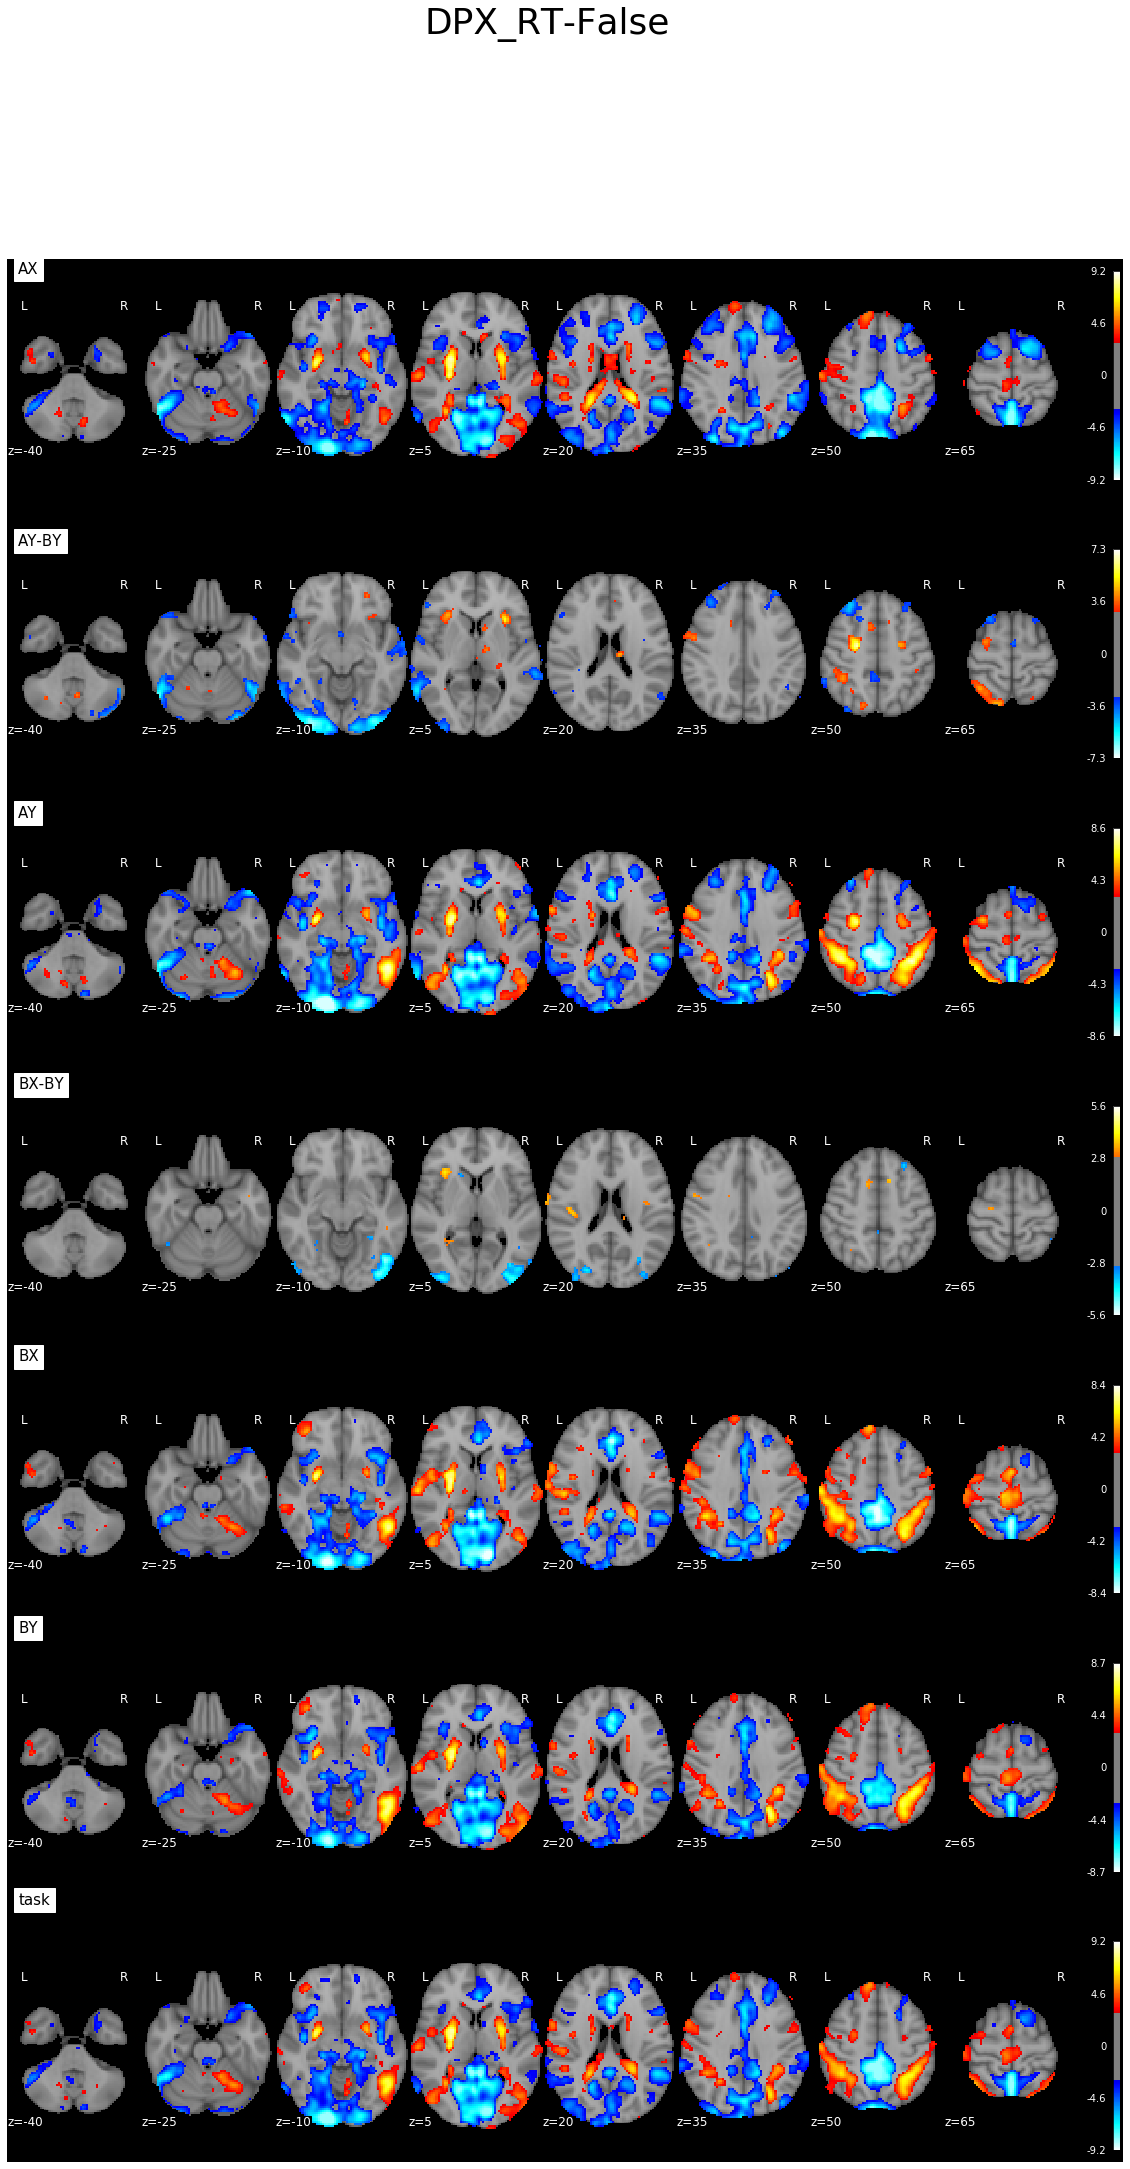

DPX_RT-False
AX_raw_tfile
AY-BY_raw_tfile
AY_raw_tfile
BX-BY_raw_tfile
BX_raw_tfile
BY_raw_tfile
task_raw_tfile
DPX_RT-False
AX_corrected_tfile
AY-BY_corrected_tfile
AY_corrected_tfile
BX-BY_corrected_tfile
BX_corrected_tfile
BY_corrected_tfile
task_corrected_tfile
../../../tmp/OAK/data/uh2/aim1/BIDS_scans/derivatives/2ndlevel/DPX/secondlevel-RT-True_beta-False_maps
DPX_RT-True
AX
AY-BY
AY


KeyboardInterrupt: 

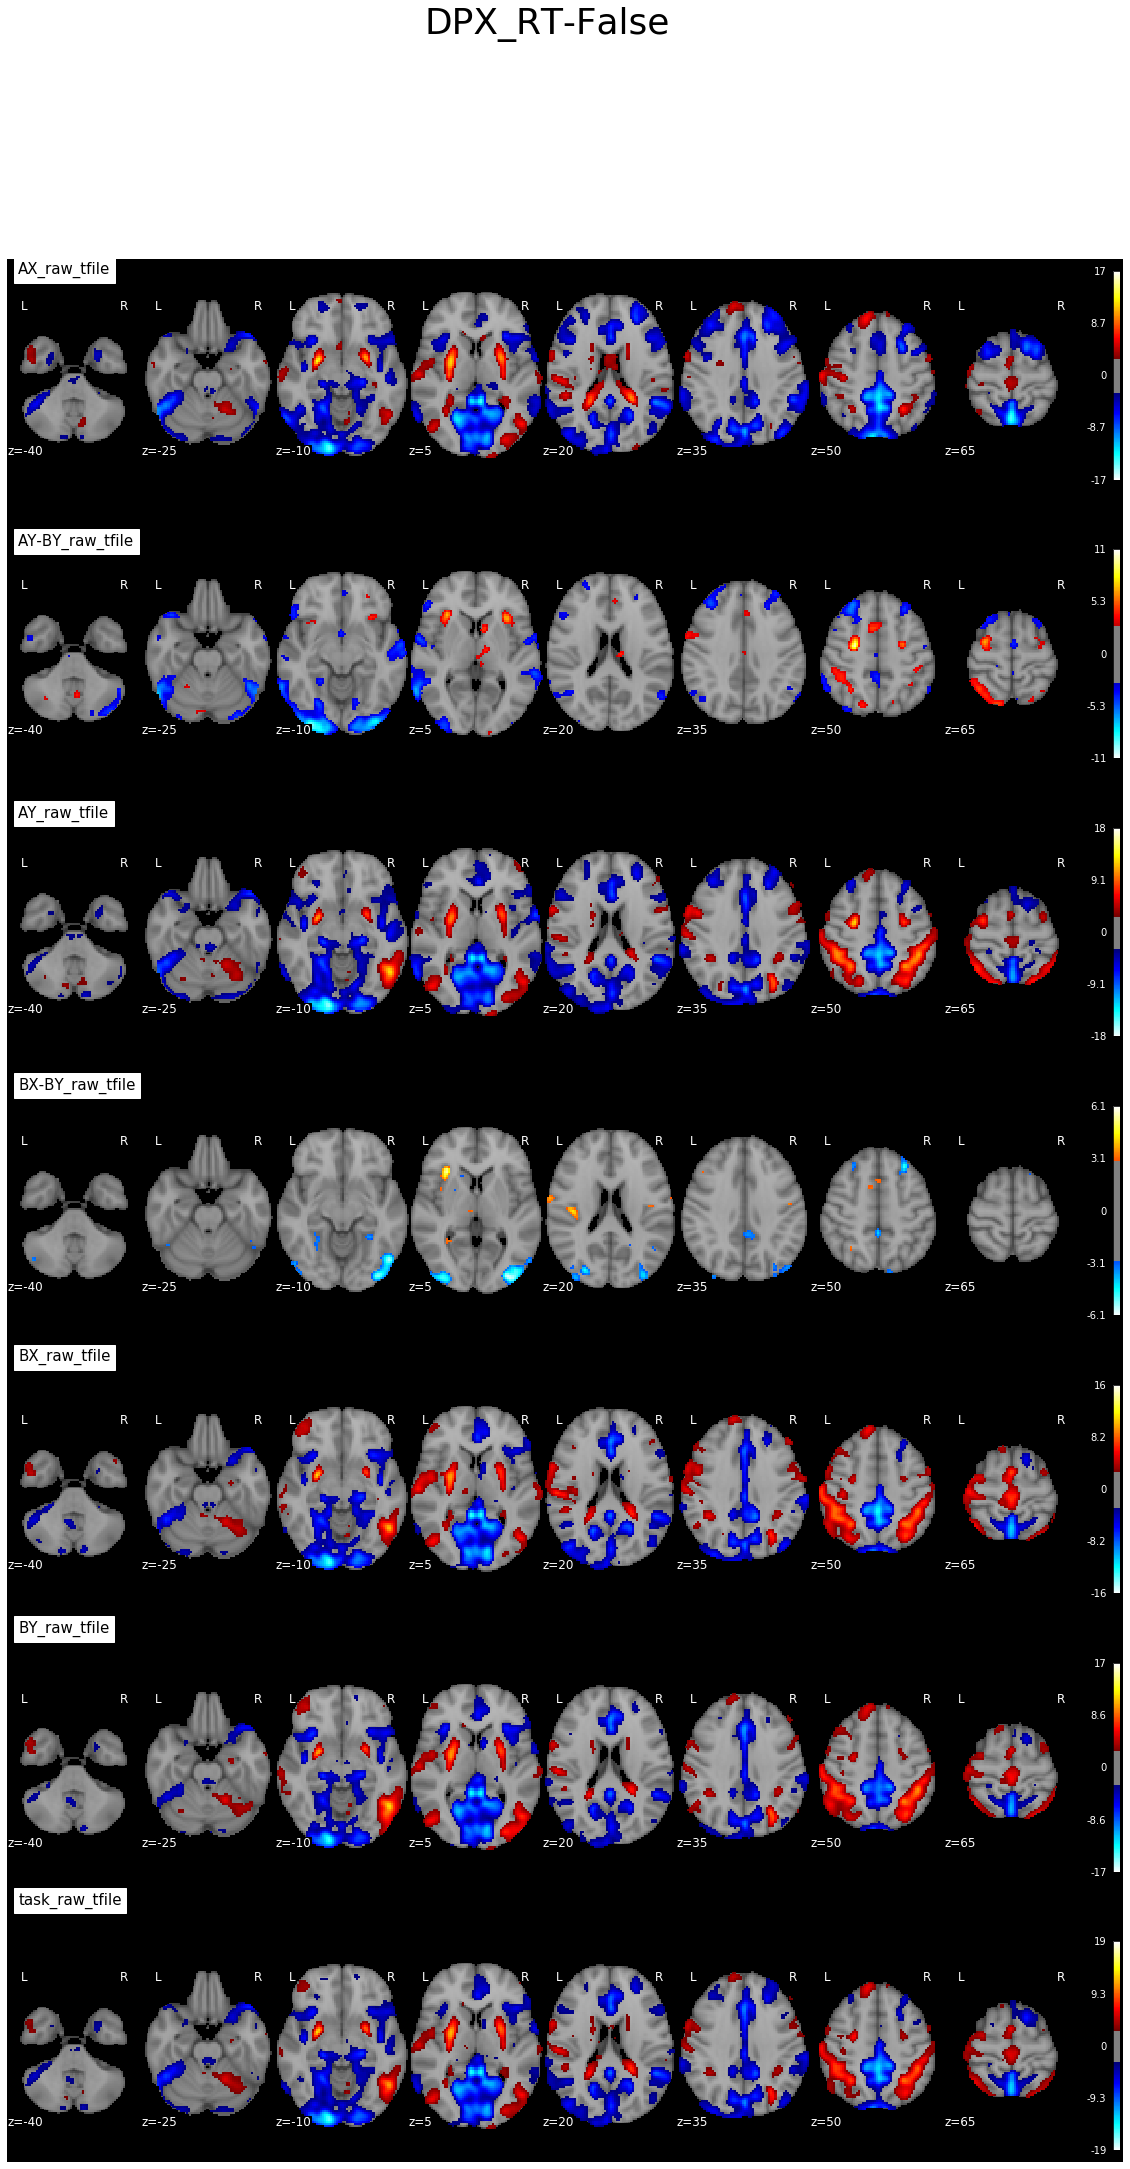

Error in callback <function flush_figures at 0x1a1e8f4a60> (for post_execute):


KeyboardInterrupt: 

In [63]:
group='NONE'
run_second_level = True
if run_second_level:
    print('running!')
    for task in tasks:
        print(task)
        contrast_dirs = sorted(glob(path.join(second_level_dir, task, '*maps')))
        for contrast_dir in contrast_dirs:
            if group == 'NONE':
                out_dir = contrast_dir
            else:
                out_dir = path.join(contrast_dir, group)
            print(out_dir)
            contrast_maps = sorted(glob(path.join(out_dir, '*.nii.gz')))
            beta_maps = [mapi for mapi in contrast_maps if 'tfile' not in mapi] 
            t_maps = [mapi for mapi in contrast_maps if 'raw_tfile' in mapi] 
            corrected_t_maps = [mapi for mapi in contrast_maps if 'corrected_tfile' in mapi] 
            RT_flag = 'RT-True' in contrast_dir
            curr_title = task+'_RT-'+str(RT_flag)
            
            f_beta = plot_task_maps(beta_maps, curr_title)
            plt.show()
            f_raw_t = plot_task_maps(t_maps, curr_title)
            f_corr_t = plot_task_maps(corrected_t_maps, curr_title)
#             if save:
#                 output_beta = path.join(out_dir, task+'_plots.pdf')
#                 f_beta.savefig(output_beta)
#                 output_raw_t = path.join(out_dir, task+'_raw_tfile_plots.pdf')
#                 f_beta.savefig(output_raw_t)
#                 output_corr_t = path.join(out_dir, task+'_corrected_tfile_plots.pdf')
#                 f_beta.savefig(output_corr_t)  